In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()
import torch

In [356]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
   
    plt.plot(percentages,mean, label=label, color=color)
    plt.fill_between(percentages, mean + std, mean - std, facecolor=color, alpha=0.5)
    if log: plt.xscale('log')
    plt.legend(fontsize=18)

In [3]:
def treat(arr):
    l = []
    k = []
    for i in range(arr.shape[0]):
        if arr[i]!=0:
            l.append(i)
    return l

In [96]:
random = np.load('new_random.npy')
r = treat(random[0])
random = np.load('new_random.npy')[:,r]
random.shape,np.min(random)

((10, 262), 0.4521028)

____________

## Disagreement

In [169]:
mc_f_no_y = np.load('results_mc_dropout/f_no_secondary_yes.npy')
mc_f_n_y = treat(mc_f_no_y[0])
mc_f_no_y = np.load('results_mc_dropout/f_no_secondary_yes.npy')[:,mc_f_n_y]
mc_f_no_y.shape,np.min(mc_f_no_y)

((5, 262), 0.45443925)

In [190]:
mc_f_no_no = np.load('results_mc_dropout/f_no_secondary_no.npy')
mc_f_n_n = treat(mc_f_no_no[0])
mc_f_no_no = np.load('results_mc_dropout/f_no_secondary_no.npy')[:,mc_f_n_n]
mc_f_no_no.shape,np.min(mc_f_no_no)

((5, 262), 0.48364487)

In [171]:
mc_f_ebmal_no = np.load('results_mc_dropout/f_ebmal_no.npy')
mc_f_e_n = treat(mc_f_ebmal_no[0])
mc_f_ebmal_no = np.load('results_mc_dropout/f_ebmal_no.npy')[:,mc_f_e_n]
mc_f_ebmal_no.shape,np.min(mc_f_ebmal_no)

((5, 262), 0.48364487)

In [172]:
mc_f_ebmal_y = np.load('results_mc_dropout/f_ebmal_yes.npy')
mc_f_e_y = treat(mc_f_ebmal_y[0])
mc_f_ebmal_y = np.load('results_mc_dropout/f_ebmal_yes.npy')[:,mc_f_e_y]
mc_f_ebmal_y.shape,np.min(mc_f_ebmal_y)

((5, 262), 0.48364487)

In [173]:
b_f_ebmal_y = np.load('results_bootstrap/f_ebmal_yes.npy')
b_f_e_y = treat(b_f_ebmal_y[0])
b_f_ebmal_y = np.load('results_bootstrap/f_ebmal_yes.npy')[:,b_f_e_y]
b_f_ebmal_y.shape,np.min(b_f_ebmal_y)

ValueError: zero-size array to reduction operation minimum which has no identity

____________

_______________________

## Max Entropy

In [ ]:
mc_e_no_y = np.load('results_mc_dropout/max_entropy_no_secondary_yes.npy')
mc_e_n_y = treat(mc_e_no_y[0])
mc_e_no_y = np.load('results_mc_dropout/max_entropy_no_secondary_yes.npy')[:,mc_e_n_y]
mc_e_no_y.shape,np.min(mc_e_no_y)

In [74]:
mc_e_no_no = np.load('results_mc_dropout/max_entropy_no_secondary_no.npy')
mc_e_n_n = treat(mc_e_no_no[0])
mc_e_no_no = np.load('results_mc_dropout/max_entropy_no_secondary_no.npy')[:,mc_e_n_n]
mc_e_no_no.shape,np.min(mc_e_no_no)

((5, 262), 0.4754673)

In [75]:
mc_e_ebmal_no = np.load('results_mc_dropout/max_entropy_ebmal_no.npy')
mc_e_e_n = treat(mc_e_ebmal_no[0])
mc_e_ebmal_no = np.load('results_mc_dropout/max_entropy_ebmal_no.npy')[:,mc_e_e_n]
mc_e_ebmal_no.shape,np.min(mc_e_ebmal_no)

((5, 262), 0.48364487)

In [76]:
mc_e_ebmal_y = np.load('results_mc_dropout/max_entropy_ebmal_yes.npy')
mc_e_e_y = treat(mc_e_ebmal_y[0])
mc_e_ebmal_y = np.load('results_mc_dropout/max_entropy_ebmal_yes.npy')[:,mc_e_e_y]
mc_e_ebmal_y.shape,np.min(mc_e_ebmal_y)

((5, 262), 0.48364487)

<Figure size 432x288 with 0 Axes>

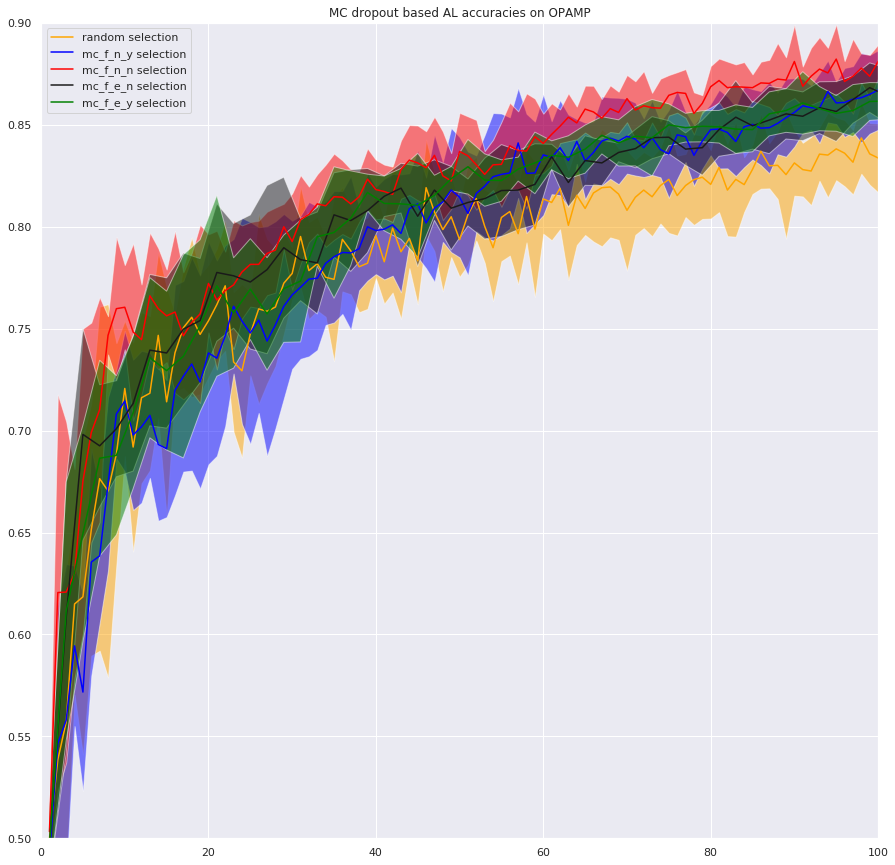

In [71]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 100), ylim=(0.5, 0.9), autoscale_on=False,title='MC dropout based AL accuracies on OPAMP')
plot_mean_std(np.array(r)[:101],random[:,:101],'random selection',color='orange')
plot_mean_std(np.array(mc_f_n_y)[:101],mc_f_no_y[:,:101],'mc_f_n_y selection',color='blue')
plot_mean_std(np.array(mc_f_n_n)[:101],mc_f_no_no[:,:101],'mc_f_n_n selection',color='red')
plot_mean_std(np.array(mc_f_e_n)[:101],mc_f_ebmal_no[:,:101],'mc_f_e_n selection',color='k')
plot_mean_std(np.array(mc_f_e_y)[:101],mc_f_ebmal_y[:,:101],'mc_f_e_y selection',color='green')

#plt.savefig('graph_mc_02.png')

<Figure size 432x288 with 0 Axes>

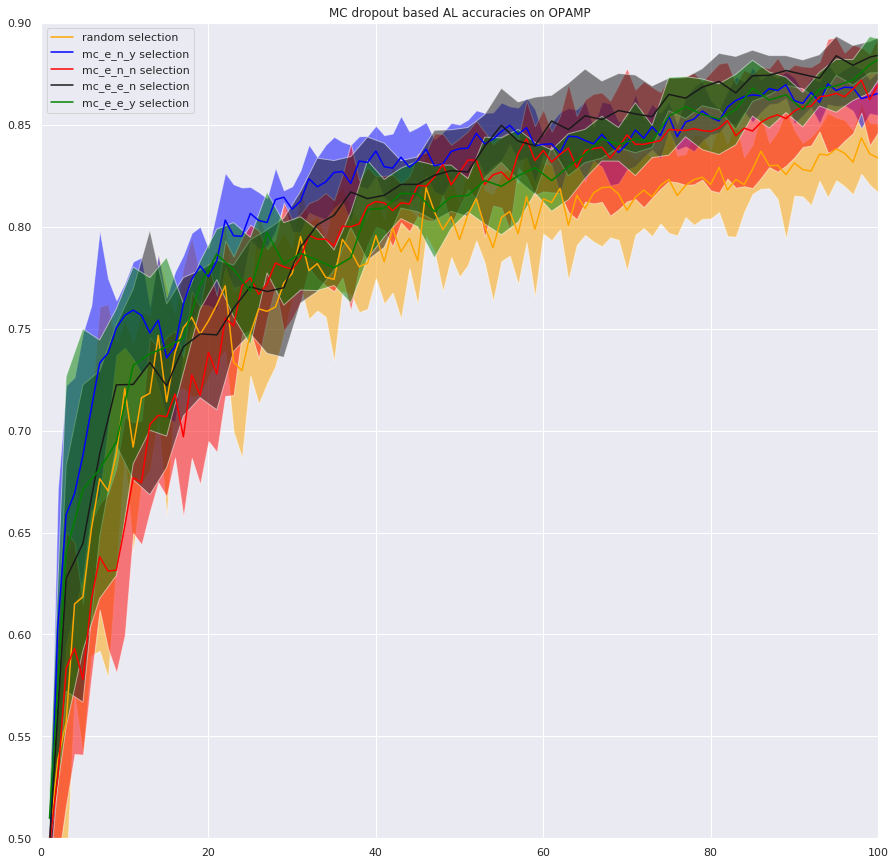

In [77]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 100), ylim=(0.5, 0.9), autoscale_on=False,title='MC dropout based AL accuracies on OPAMP')
plot_mean_std(np.array(r)[:101],random[:,:101],'random selection',color='orange')
plot_mean_std(np.array(mc_e_n_y)[:101],mc_e_no_y[:,:101],'mc_e_n_y selection',color='blue')
plot_mean_std(np.array(mc_e_n_n)[:101],mc_e_no_no[:,:101],'mc_e_n_n selection',color='red')
plot_mean_std(np.array(mc_e_e_n)[:101],mc_e_ebmal_no[:,:101],'mc_e_e_n selection',color='k')
plot_mean_std(np.array(mc_e_e_y)[:101],mc_e_ebmal_y[:,:101],'mc_e_e_y selection',color='green')

<Figure size 432x288 with 0 Axes>

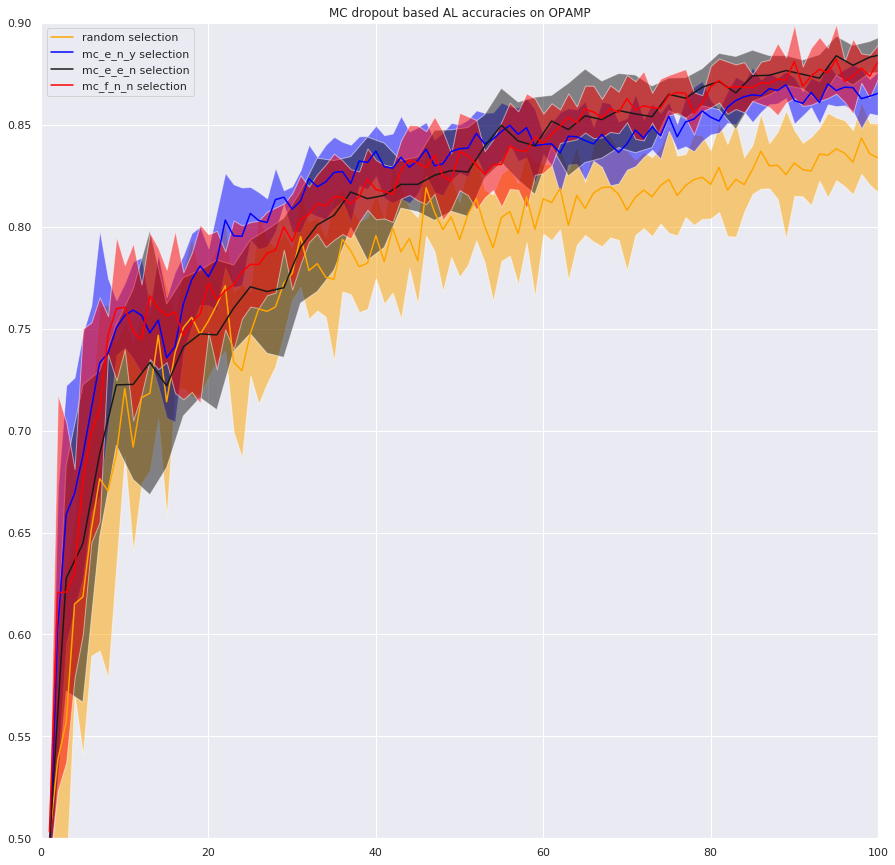

In [95]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 100), ylim=(0.5, 0.9), autoscale_on=False,title='MC dropout based AL accuracies on OPAMP')
plot_mean_std(np.array(r)[:101],random[:,:101],'random selection',color='orange')
plot_mean_std(np.array(mc_e_n_y)[:101],mc_e_no_y[:,:101],'mc_e_n_y selection',color='blue')
plot_mean_std(np.array(mc_e_e_n)[:101],mc_e_ebmal_no[:,:101],'mc_e_e_n selection',color='k')
plot_mean_std(np.array(mc_f_n_n)[:101],mc_f_no_no[:,:101],'mc_f_n_n selection',color='red')



___________

_____

<Figure size 432x288 with 0 Axes>

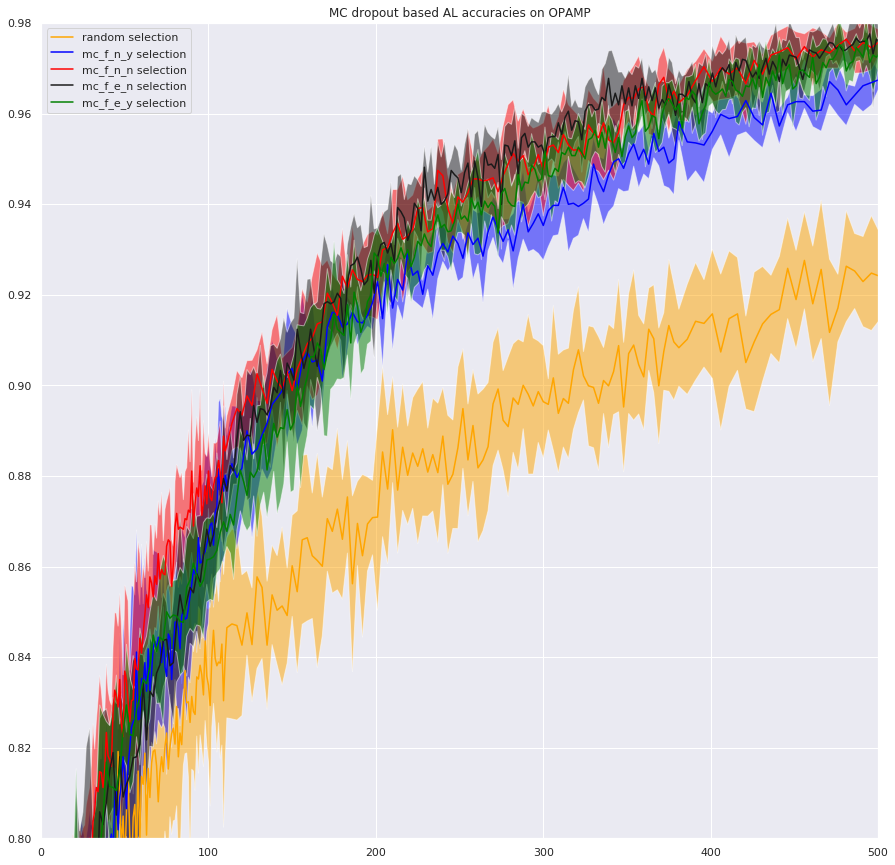

In [72]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 500), ylim=(0.8, 0.98), autoscale_on=False,title='MC dropout based AL accuracies on OPAMP')
plot_mean_std(np.array(r),random,'random selection',color='orange')
plot_mean_std(np.array(mc_f_n_y)[:],mc_f_no_y[:,:],'mc_f_n_y selection',color='blue')
plot_mean_std(np.array(mc_f_n_n)[:],mc_f_no_no[:,:],'mc_f_n_n selection',color='red')
plot_mean_std(np.array(mc_f_e_n)[:],mc_f_ebmal_no[:,:],'mc_f_e_n selection',color='k')
plot_mean_std(np.array(mc_f_e_y)[:],mc_f_ebmal_y[:,:],'mc_f_e_y selection',color='green')

#plt.savefig('.png')

<Figure size 432x288 with 0 Axes>

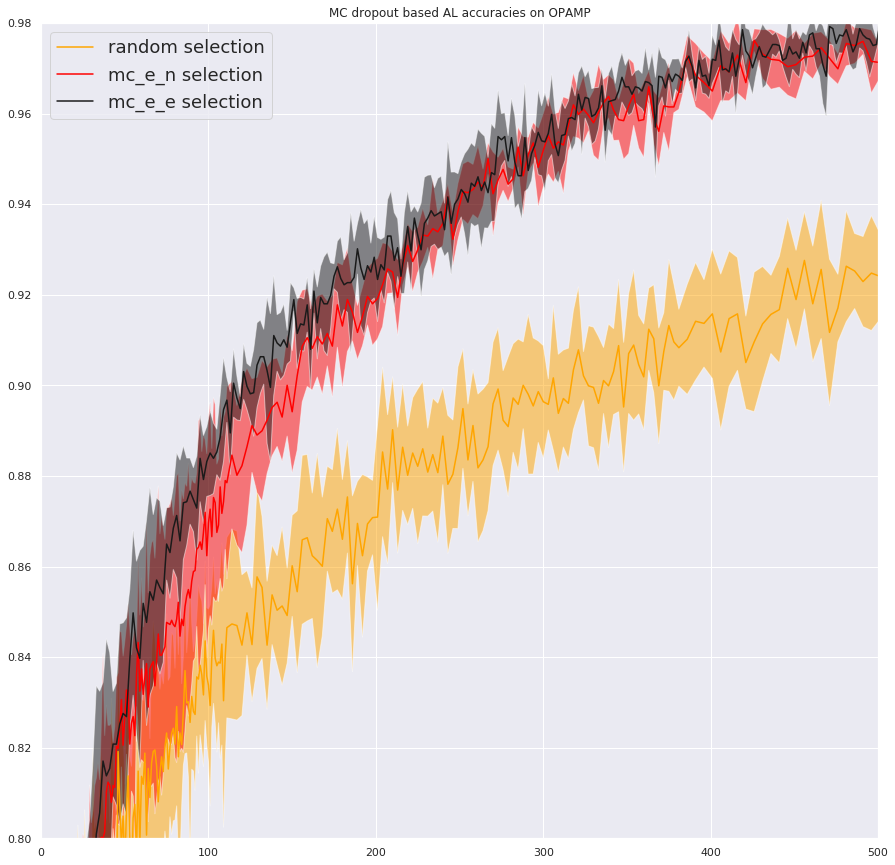

In [357]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 500), ylim=(0.8, 0.98), autoscale_on=False,title='MC dropout based AL accuracies on OPAMP')
plot_mean_std(np.array(r),random,'random selection',color='orange')
plot_mean_std(np.array(mc_e_n_n)[:],mc_e_no_no[:,:],'mc_e_n selection',color='red')
plot_mean_std(np.array(mc_e_e_n)[:],mc_e_ebmal_no[:,:],'mc_e_e selection',color='k')


<Figure size 432x288 with 0 Axes>

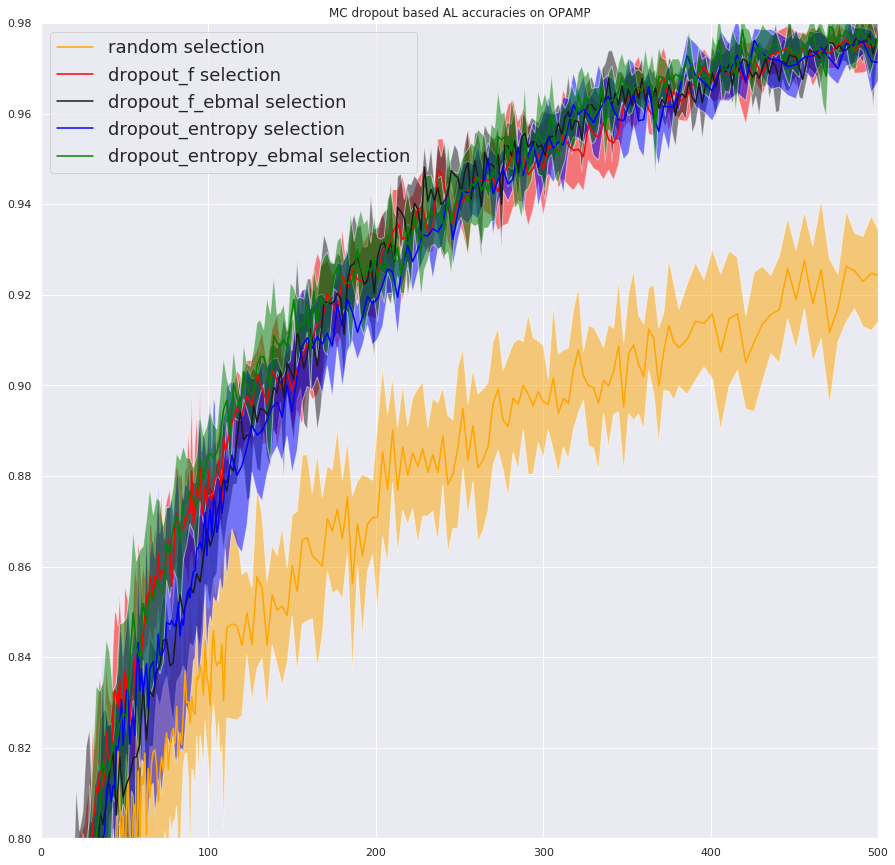

In [360]:
plt.clf()
figsrc, axsrc = plt.subplots(figsize=(15,15))
axsrc.set(xlim=(0, 500), ylim=(0.8, 0.98), autoscale_on=False,title='MC dropout based AL accuracies on OPAMP')
plot_mean_std(np.array(r),random,'random selection',color='orange')
plot_mean_std(np.array(mc_f_n_n)[:],mc_f_no_no[:,:],'dropout_f selection',color='red')
plot_mean_std(np.array(mc_f_e_n)[:],mc_f_ebmal_no[:,:],'dropout_f_ebmal selection',color='k')
plot_mean_std(np.array(mc_e_n_n)[:],mc_e_no_no[:,:],'dropout_entropy selection',color='blue')
plot_mean_std(np.array(mc_e_e_n)[:],mc_e_ebmal_no[:,:],'dropout_entropy_ebmal selection',color='green')
plt.savefig('curves_opamp.png')

In [118]:
import os

for filename in os.listdir('results_mc_dropout/'):
    if filename.endswith(".npy"):
        print(filename)


FileNotFoundError: [Errno 2] No such file or directory: 'mean_std_no_secondary_yes.npy'

In [303]:
random = np.load('new_random.npy')
r = treat(random[0])
random = np.load('new_random.npy')[:,r]
random.shape,np.min(random)

((10, 262), 0.4521028)

In [304]:
perc = [0.5,0.6,0.7,0.8,0.85,0.88,0.9,0.92,0.94,0.96,0.98]
direct = ['random/','results_mc_dropout/','results_bootstrap/']

In [305]:
np.where(np.array(perc)>0.7)[0]

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [306]:
a = np.where(np.array(perc)>1)[0]
a

array([], dtype=int64)

In [307]:
def make_table(perc,direct):
    
    l = len(perc)
    
    table = {}
        
    for d in direct:
        print(d)
        for filename in os.listdir(d):
            if filename.endswith("no.npy"):
                                
                results = np.load(d + filename)
                
                
                n_samples = treat(results[0])
                results = results[:,n_samples] 
                                
                try:

                    if results.shape[1] > 10:
                        
                        
                        mean = np.mean(results,axis=0)
                        
                        t = np.zeros((l))

                        for i in range(l):
                            
                            indexes = np.where(mean>=perc[i])[0]
                                                        
                            if len(indexes)==0:
                                t[i] = 0
                            else:
                                t[i]=indexes[0]


                        table[d+filename[:-4]]= t

                        print(d+filename[:-4] + ' ok')

                        print('')
                    
                    else :
                        raise BreakIt 
                    
                except BreakIt:
                    pass
    
    
    return table,perc

In [324]:
def make_table(perc,direct):
    
    l = len(perc)
    
    table = {}
        
    for d in direct:
        print(d)
        for filename in os.listdir(d):
            if filename.endswith("no.npy")  or filename.endswith("m.npy") :
                                
                results = np.load(d + filename)
                
                
                n_samples = treat(results[0])
                results = results[:,n_samples] 
                                
                try:

                    if results.shape[1] > 10:
                        
                        
                        mean = np.mean(results,axis=0)
                        
                        t = list(np.zeros((l)))

                        for i in range(l):
                            print(i)
                            
                            print(results.shape)
                            
                            try:
                            
                                indexes = [np.where(results[j]>=perc[i])[0][0] for j in range(results.shape[0])]
                            except:
                                
                                mean = np.mean(results,axis=0)
                                indexes = np.where(mean>=perc[i])[0]
                            
                            print(indexes)
                                                        
                            if len(indexes)==0:
                                t[i] = 0
                            else:
                                t[i]= str(np.mean(indexes)) + ' +/- ' + str(round(np.std(indexes),1)) 
                            
                            print(t[i])

                        table[d[8:]+filename[:-7]]= t

                        print(d+filename[:-4] + ' ok')

                        print('')
                    
                    else :
                        raise BreakIt 
                    
                except BreakIt:
                    pass
    
    
    return table,perc

In [346]:
a,perc = make_table(perc,direct)

random/
0
(10, 262)
[1, 2, 1, 1, 0, 2, 0, 0, 0, 0]
0.7 +/- 0.8
1
(10, 262)
[4, 3, 3, 1, 2, 2, 1, 3, 3, 3]
2.5 +/- 0.9
2
(10, 262)
[4, 4, 6, 7, 6, 4, 6, 7, 5, 8]
5.7 +/- 1.3
3
(10, 262)
[34, 13, 35, 26, 25, 17, 6, 17, 25, 26]
22.4 +/- 8.7
4
(10, 262)
[58, 65, 72, 55, 67, 87, 45, 60, 63, 67]
63.9 +/- 10.5
5
(10, 262)
[132, 128, 125, 127, 116, 126, 125, 126, 126, 131]
126.2 +/- 4.1
6
(10, 262)
[141, 149, 153, 144, 141, 145, 141, 151, 143, 132]
144.0 +/- 5.7
7
(10, 262)
[164, 170, 191, 186, 166, 180, 157, 171, 168, 175]
172.8 +/- 9.8
8
(10, 262)
[228, 212, 225, 231, 231, 223, 217, 231, 215, 204]
221.7 +/- 8.9
9
(10, 262)
[]
0
10
(10, 262)
[]
0
random/random ok

results_mc_dropout/
0
(5, 262)
[0, 1, 1, 0, 1]
0.6 +/- 0.5
1
(5, 262)
[1, 3, 1, 1, 1]
1.4 +/- 0.8
2
(5, 262)
[4, 3, 2, 8, 4]
4.2 +/- 2.0
3
(5, 262)
[14, 18, 13, 21, 12]
15.6 +/- 3.4
4
(5, 262)
[24, 30, 19, 37, 27]
27.4 +/- 6.0
5
(5, 262)
[40, 40, 44, 54, 32]
42.0 +/- 7.2
6
(5, 262)
[47, 55, 57, 66, 54]
55.8 +/- 6.1
7
(5, 262)
[81, 8

In [347]:
import pandas as pd

In [348]:
df = pd.DataFrame(a,index=perc)
df.columns = ['random',' mc dropout/max entropy ebmal',' mc dropout/f ebmal',' mc dropout/max entropy no secondary',' mc dropout/f no secondary',' bootstrap/max entropy ebmal',' bootstrap/f ebmal',' bootstrap/max entropy no secondary',' bootstrap/f no secondary']

In [349]:
df['percentage'] = df.index
df

,random,mc dropout/max entropy ebmal,mc dropout/f ebmal,mc dropout/max entropy no secondary,mc dropout/f no secondary,bootstrap/max entropy ebmal,bootstrap/f ebmal,bootstrap/max entropy no secondary,bootstrap/f no secondary,percentage
0.50,0.7 +/- 0.8,0.6 +/- 0.5,0.8 +/- 0.7,0.8 +/- 0.7,0.4 +/- 0.5,1.2 +/- 0.7,0.4 +/- 0.5,0.4 +/- 0.8,0.4 +/- 0.5,0.50
0.60,2.5 +/- 0.9,1.4 +/- 0.8,1.2 +/- 0.4,4.4 +/- 3.3,1.8 +/- 1.2,2.2 +/- 1.0,1.8 +/- 0.7,3.2 +/- 3.0,2.6 +/- 1.5,0.60
0.70,5.7 +/- 1.3,4.2 +/- 2.0,2.6 +/- 0.8,13.2 +/- 4.5,4.0 +/- 2.7,3.2 +/- 1.2,4.4 +/- 1.0,7.4 +/- 5.4,8.4 +/- 3.1,0.70
0.80,22.4 +/- 8.7,15.6 +/- 3.4,13.6 +/- 5.6,30.0 +/- 5.5,21.2 +/- 10.9,14.2 +/- 5.1,12.6 +/- 4.8,31.4 +/- 16.7,24.4 +/- 5.7,0.80
0.85,63.9 +/- 10.5,27.4 +/- 6.0,38.4 +/- 7.4,66.4 +/- 20.8,57.2 +/- 11.0,27.4 +/- 7.6,30.8 +/- 6.1,57.6 +/- 23.2,53.4 +/- 9.2,0.85
0.88,126.2 +/- 4.1,42.0 +/- 7.2,53.4 +/- 3.6,97.4 +/- 16.9,86.8 +/- 16.1,50.8 +/- 8.1,45.6 +/- 6.5,97.0 +/- 11.1,98.2 +/- 12.3,0.88
0.90,144.0 +/- 5.7,55.8 +/- 6.1,62.4 +/- 6.5,115.4 +/- 14.5,106.6 +/- 9.4,72.8 +/- 9.2,65.0 +/- 12.7,113.8 +/- 6.4,122.8 +/- 0.7,0.90
0.92,172.8 +/- 9.8,78.4 +/- 7.9,81.0 +/- 10.6,129.8 +/- 6.7,129.6 +/- 5.2,89.8 +/- 13.5,86.4 +/- 9.4,125.6 +/- 5.3,133.0 +/- 3.3,0.92
0.94,221.7 +/- 8.9,107.4 +/- 12.1,105.6 +/- 6.3,152.2 +/- 3.1,145.0 +/- 4.3,110.6 +/- 10.9,116.2 +/- 11.8,145.0 +/- 4.6,150.6 +/- 2.1,0.94
0.96,0,136.2 +/- 10.9,138.6 +/- 15.6,173.6 +/- 7.6,178.2 +/- 11.5,150.0 +/- 9.5,151.0 +/- 19.3,167.0 +/- 4.9,171.8 +/- 7.1,0.96


In [350]:
df.to_csv('table_opamp_final.csv')